<a href="https://colab.research.google.com/github/radeonaru/pcvk_ganjil_2024/blob/main/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nama : Muhammad Bagus Indrawan**

**Kelas : TI-3A/20**

**NIM : 2241720217**

# MODUL 10 – Thresholding, Segmentasi Sederhana
### D. TUGAS PRAKTIKUM

1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab
terhubung dengan Github Anda, lanjutkan dengan memilih repository yang telah
digunakan pada praktikum minggu lalu, rename file menjadi “Week9.ipynb”.
Kemudian import folder yang ada di Drive Anda dengan cara sebagai berikut.  

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum
minggu ke-6 berikut.

In [3]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

3. Buat Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV), dengan
threshold= 170, secara manual sesuai dengan deskripsi dari grafik yang ditunjukkan di
atas.

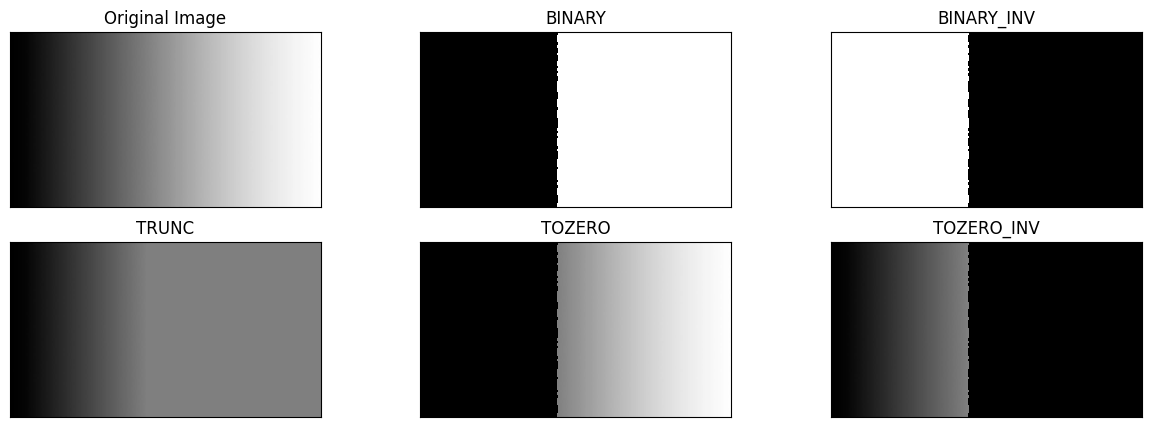

In [4]:
filename = ('drive/MyDrive/PCVK/gradient.jpg')
img = cv.imread(filename)
thresh = 127      #nilai Threshold yang ditentukan

#1. thresh1 jika pixel di img>127, maka thresh1 bernilai 1(putih) selain itu bernilai 0(hitam)
ret,thresh1 = cv.threshold(img,thresh,255,cv.THRESH_BINARY)
#2. thresh2 adalah binary threshold inverse
ret,thresh2 = cv.threshold(img,thresh,255,cv.THRESH_BINARY_INV)
#3. Threshold Truncate
ret,thresh3 = cv.threshold(img,thresh,255,cv.THRESH_TRUNC)
#4. Threshold Tozero
ret,thresh4 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO)
#5. Threshold Tozero Inverse
ret,thresh5 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize = (15,5))
for i in range(len(images)):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()


4. Buat Otsu Thresholding tanpa menggunakan Library. Tampilkan juga nilai threshold
saat anda gunakan Otsu’s, seperti terlihat pada gambar hasil berikut. (gunakan image
balloon.jpg agar terlihat beda antara hasil otsu’s dengan global threshold biasa)

Nilai threshold optimal Otsu: 185


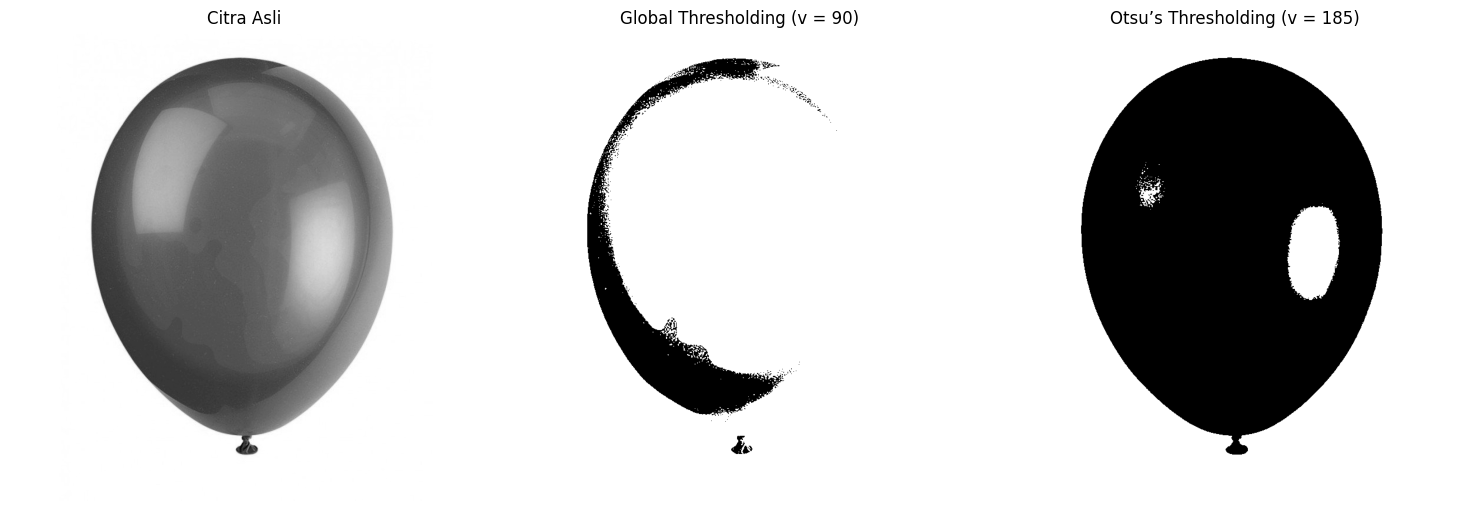

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Fungsi untuk menerapkan Global Thresholding
def global_threshold(image, threshold):
    return (image > threshold).astype(np.uint8) * 255

# Fungsi untuk menerapkan Otsu's Thresholding
def otsu_threshold(image):
    # Hitung histogram
    hist, _ = np.histogram(image, bins=256, range=(0, 256))

    # Normalisasi histogram
    hist = hist / hist.sum()

    # Hitung jumlah kumulatif dan rata-rata kumulatif
    cumulative_sum = np.cumsum(hist)
    cumulative_mean = np.cumsum(hist * np.arange(256))

    global_mean = cumulative_mean[-1]  # Rata-rata dari seluruh gambar

    # Hitung varians antar kelas
    best_threshold = 0
    max_variance = 0

    for t in range(1, 256):
        prob_bg = cumulative_sum[t]  # Probabilitas background
        prob_fg = 1 - prob_bg  # Probabilitas foreground

        if prob_bg == 0 or prob_fg == 0:
            continue

        mean_bg = cumulative_mean[t] / prob_bg  # Rata-rata background
        mean_fg = (cumulative_mean[-1] - cumulative_mean[t]) / prob_fg  # Rata-rata foreground

        # Varians antar kelas
        between_class_variance = prob_bg * prob_fg * (mean_bg - mean_fg) ** 2

        # Simpan threshold terbaik (yang memaksimalkan varians antar kelas)
        if between_class_variance > max_variance:
            max_variance = between_class_variance
            best_threshold = t

    # Kembalikan threshold optimal
    return best_threshold

# Muat gambar dan ubah ke skala abu-abu
image_path = 'drive/MyDrive/PCVK/balloon.jpg'  # Ganti dengan path gambar
image = Image.open(image_path).convert('L')  # Konversi ke skala abu-abu
image_np = np.array(image)

# Terapkan Global Thresholding
global_thresh_value = 90  # Nilai threshold global (bisa disesuaikan)
global_thresh_image = global_threshold(image_np, global_thresh_value)

# Terapkan Otsu's Thresholding
otsu_thresh_value = otsu_threshold(image_np)
otsu_thresh_image = global_threshold(image_np, otsu_thresh_value)

# Tampilkan threshold hasil Otsu
print(f'Nilai threshold optimal Otsu: {otsu_thresh_value}')

# Plot gambar asli, Global Threshold, dan Otsu's Threshold
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Gambar asli
ax[0].imshow(image_np, cmap='gray')
ax[0].set_title('Citra Asli')
ax[0].axis('off')

# Hasil Global Thresholding
ax[1].imshow(global_thresh_image, cmap='gray')
ax[1].set_title(f'Global Thresholding (v = {global_thresh_value})')
ax[1].axis('off')

# Hasil Otsu's Thresholding
ax[2].imshow(otsu_thresh_image, cmap='gray')
ax[2].set_title(f'Otsu’s Thresholding (v = {otsu_thresh_value})')
ax[2].axis('off')

plt.tight_layout()
plt.show()


5. Buat histogram dari citra tersegmentasi, Histogram hanya pada foreground image
saja. Gunakan image tobacco.jpg yang sudah disediakan di folder images.
Petunjuk:  
a. anda dapat gunakan cv.calcHist untuk menampilkan histogram.  
b. Buka link berikut https://opencvtutorial.readthedocs.io/en/latest/histogram/histogram.html   
c. Dari link tersebut perhatikan bahwa cv.calcHist memiliki salah satu parameter
yaitu mask. Jika diset None, maka keseluruhan image akan dihitung
histogramnya. Jika kita tentukan mask, maka hanya bagian image yang
dimasking warna putih yang akan dihitung histogramnya (dari contoh
dibawah dinamakan dengan Citra Segment).

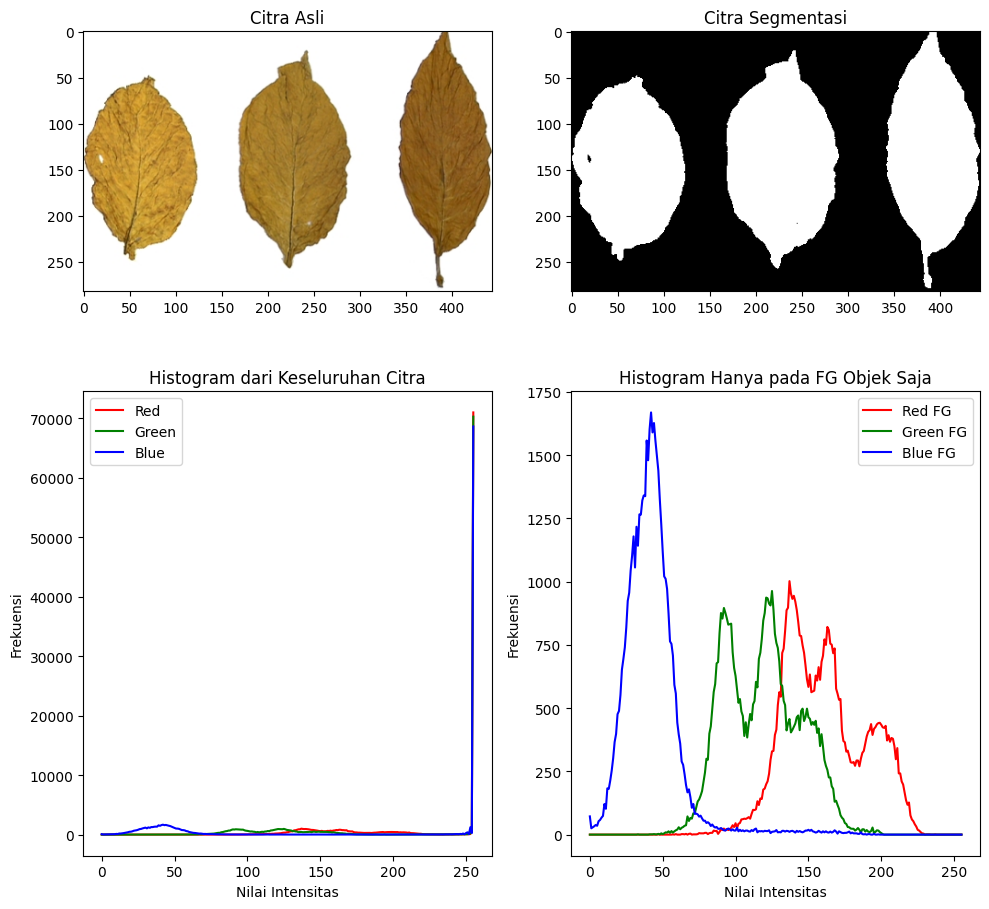

In [23]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Muat citra
image_path = 'drive/MyDrive/PCVK/tobacco.jpg'  # Ganti dengan path yang sesuai
image = cv.imread(image_path)
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
_, segmented_image = cv.threshold(image_gray, 200, 255, cv.THRESH_BINARY)

# Membalik mask sehingga foreground menjadi putih (255) dan background menjadi hitam (0)
segmented_image = cv.bitwise_not(segmented_image)

# Hitung histogram keseluruhan citra
hist_total_b = cv.calcHist([image], [0], None, [256], [0, 256])  # Blue
hist_total_g = cv.calcHist([image], [1], None, [256], [0, 256])  # Green
hist_total_r = cv.calcHist([image], [2], None, [256], [0, 256])  # Red

# Hitung histogram untuk citra foreground (masking)
# Membuat mask dari citra segmentasi
hist_fg_r = cv.calcHist([image_rgb], [0], segmented_image, [256], [0, 256])  # Channel 0 untuk Red
hist_fg_g = cv.calcHist([image_rgb], [1], segmented_image, [256], [0, 256])  # Channel 1 untuk Green
hist_fg_b = cv.calcHist([image_rgb], [2], segmented_image, [256], [0, 256])  # Channel 2 untuk Blue

# Tampilkan hasil
plt.figure(figsize=(10, 10))

# Gambar asli
plt.subplot(2, 2, 1)
plt.imshow(image_rgb)
plt.title('Citra Asli')

# Citra segmentasi
plt.subplot(2, 2, 2)
plt.imshow(segmented_image, cmap='gray')
plt.title('Citra Segmentasi')

# Tampilkan histogram keseluruhan citra
plt.subplot(2, 2, 3)
plt.plot(hist_total_r, color='r', label='Red')
plt.plot(hist_total_g, color='g', label='Green')
plt.plot(hist_total_b, color='b', label='Blue')
plt.title('Histogram dari Keseluruhan Citra')
plt.xlabel('Nilai Intensitas')
plt.ylabel('Frekuensi')
plt.legend()

# Tampilkan histogram hanya pada FG objek saja
plt.subplot(2, 2, 4)
plt.plot(hist_fg_r, color='r', label='Red FG')
plt.plot(hist_fg_g, color='g', label='Green FG')
plt.plot(hist_fg_b, color='b', label='Blue FG')
plt.title('Histogram Hanya pada FG Objek Saja')
plt.xlabel('Nilai Intensitas')
plt.ylabel('Frekuensi')
plt.legend()

plt.tight_layout()
plt.show()


6. Lakukan segmentasi warna pada image "peppers.jpg", munculkan hanya warna yang
kuning saja. (Petunjuk: anda dapat gunakan K-Means untuk menampilkan hanya
warna tertentu saja)

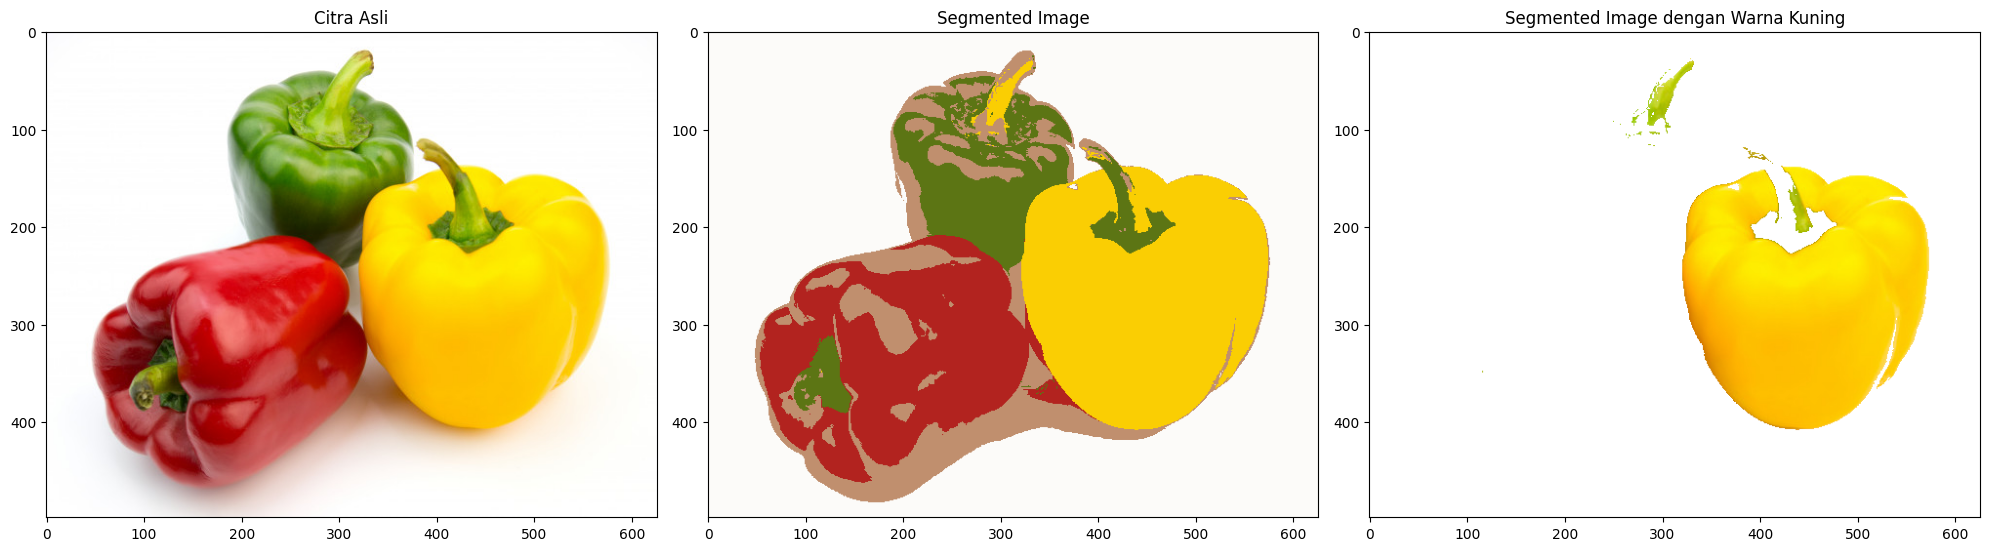

In [26]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Muat gambar
filename = 'drive/MyDrive/PCVK/peppers.jpg'
img = cv.imread(filename)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Flattening array image
pixel_values = img.reshape((-1, 3))  # Mengubah ukuran menjadi 2D
pixel_values = np.float32(pixel_values)  # Ubah tipe data menjadi float

# Kriteria untuk konvergensi
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)

# Tentukan jumlah cluster
k = 5
_, labels, centers = cv.kmeans(pixel_values, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

# Buat gambar tersegmentasi
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(img.shape)

# Ubah segmented image ke format HSV untuk segmentasi warna
hsv_image = cv.cvtColor(segmented_image.astype(np.uint8), cv.COLOR_RGB2HSV)

# Identifikasi cluster kuning
# Tentukan rentang warna kuning dalam RGB
yellow_lower = np.array([20, 100, 100])  # Batas bawah warna kuning
yellow_upper = np.array([30, 255, 255])  # Batas atas warna kuning

# Membuat mask untuk warna kuning
yellow_mask = cv.inRange(hsv_image, yellow_lower, yellow_upper)

# Langkah 6: Terapkan mask pada gambar asli
result = cv.bitwise_and(img, img, mask=yellow_mask)

# Membuat latar belakang putih
background = np.full(img.shape, 255, dtype=np.uint8)  # Buat gambar putih

# Menggabungkan gambar hasil dengan latar belakang putih
result = np.where(yellow_mask[:, :, np.newaxis] == 255, result, background)

# Tampilkan hasil
plt.figure(figsize=(20, 10))

plt.subplot(1, 3, 1)
plt.imshow(img)
plt.title('Citra Asli')

plt.subplot(1, 3, 2)
plt.imshow(segmented_image.astype(np.uint8))
plt.title('Segmented Image')

plt.subplot(1, 3, 3)
plt.imshow(result)
plt.title('Segmented Image dengan Warna Kuning')

plt.tight_layout()
plt.show()


7. Buka File crossword.jpg. Dengan pengetahuan tentang thresholding yang sudah anda
pelajari. Lakukan thresholding biner dengan hasil terbaik menurut anda. Copas code
dan hasil image di modul ini.

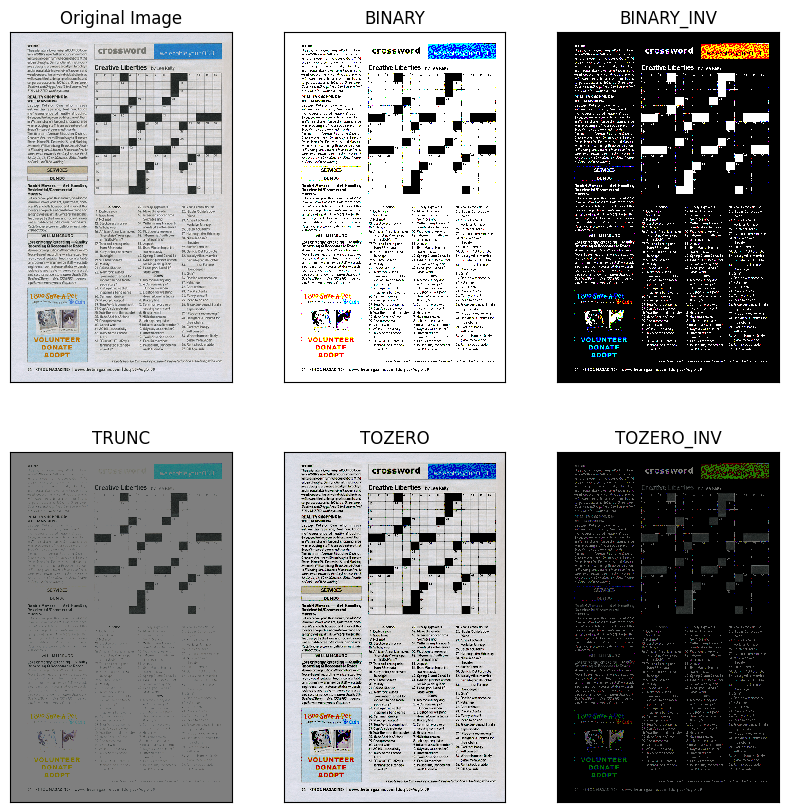

In [8]:
# Global Threshold

import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

filename = ('drive/MyDrive/PCVK/crossword.jpg')
img = cv.imread(filename)
thresh = 127      #nilai Threshold yang ditentukan

#1. thresh1 jika pixel di img>127, maka thresh1 bernilai 1(putih) selain itu bernilai 0(hitam)
ret,thresh1 = cv.threshold(img,thresh,255,cv.THRESH_BINARY)
#2. thresh2 adalah binary threshold inverse
ret,thresh2 = cv.threshold(img,thresh,255,cv.THRESH_BINARY_INV)
#3. Threshold Truncate
ret,thresh3 = cv.threshold(img,thresh,255,cv.THRESH_TRUNC)
#4. Threshold Tozero
ret,thresh4 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO)
#5. Threshold Tozero Inverse
ret,thresh5 = cv.threshold(img,thresh,255,cv.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

plt.figure(figsize = (10,10))
for i in range(len(images)):
  plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])

plt.show()

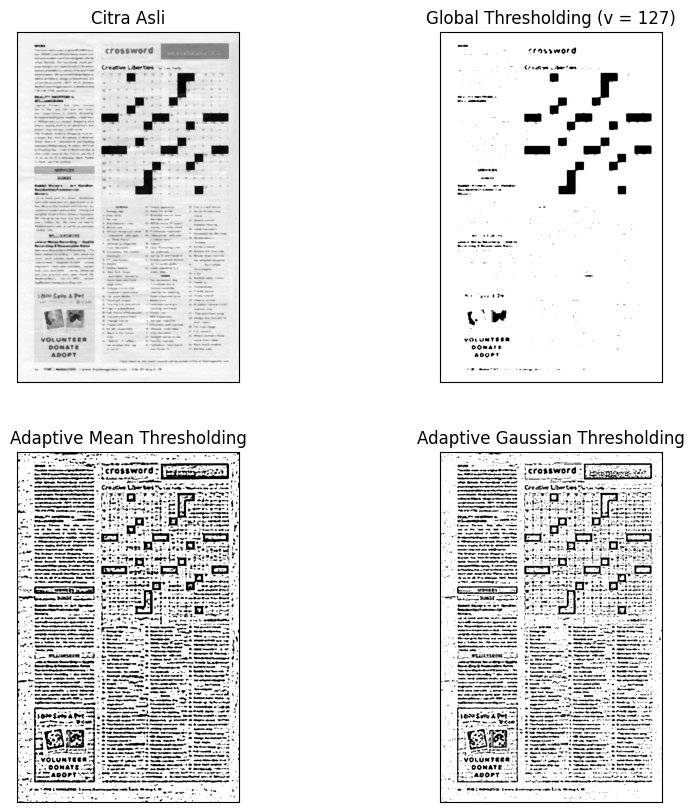

In [9]:
# Adaptive Threshold

filename = ('drive/MyDrive/PCVK/crossword.jpg')
citra = cv.medianBlur(cv.imread(filename),5)
gray = cv.cvtColor(citra, cv.COLOR_BGR2GRAY)
#gray = cv.medianBlur(gray,5)

thresh = 127

ret,th1 = cv.threshold(gray,thresh,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(gray,255,cv.ADAPTIVE_THRESH_MEAN_C, cv
 .THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(gray,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C
 , cv.THRESH_BINARY,11,2)

titles = ['Citra Asli', 'Global Thresholding (v = 127)', 'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
citra2 = [gray, th1, th2, th3]

plt.figure(figsize = (10,10))
for i in range(len(citra2)):
    plt.subplot(2,2,i+1),plt.imshow(citra2[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

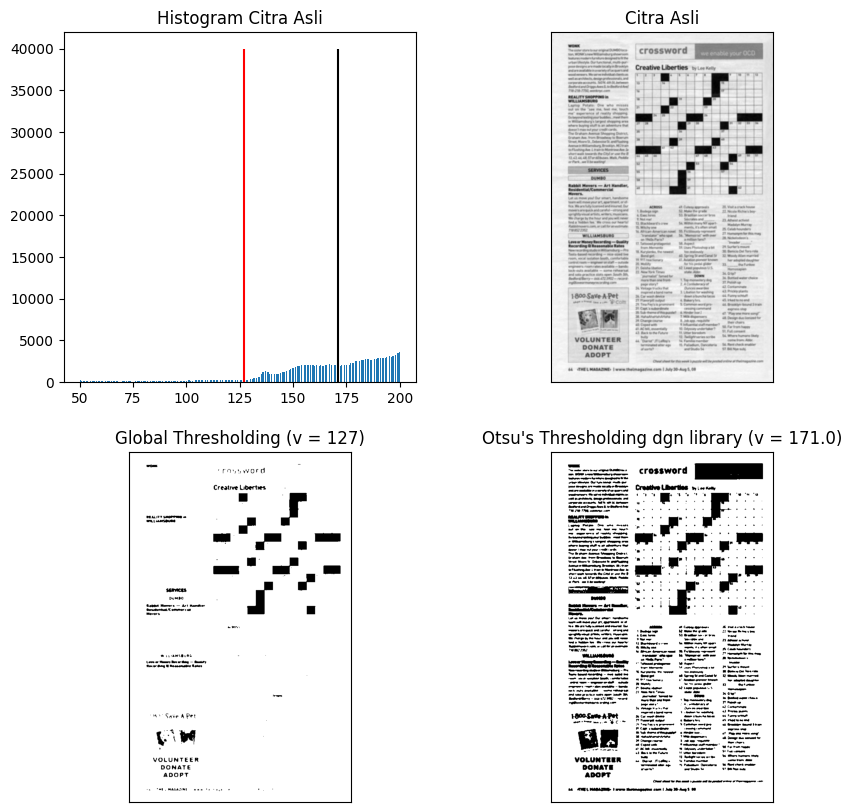

In [10]:
# Otsu Threshold

# Dengan Library
filename = ('drive/MyDrive/PCVK/crossword.jpg')
img = cv.imread(filename,0)
blur = cv.GaussianBlur(img,(5,5),0)
thresh = 127

ret,th1 = cv.threshold(blur,thresh,255,cv.THRESH_BINARY)
ret2,th2 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

x = ("Otsu's Thresholding dgn library (v = ")+str(ret2)+")"
titles = ['Citra Asli', 'Global Thresholding (v = 127)', x]
citra3 = [blur, th1, th2]

plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.hist(blur.ravel(),256,[50,200])
plt.vlines(ret,0,40000,colors='red')     #garis vertikal merah menunjukan threshold global 127
plt.vlines(ret2,0,40000,colors='black')  #garis vertikal hitam menunjukkan threshold 92 hasil otsu's
plt.title('Histogram Citra Asli')
for i in range(len(citra3)):
    plt.subplot(2,2,i+2),plt.imshow(citra3[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()


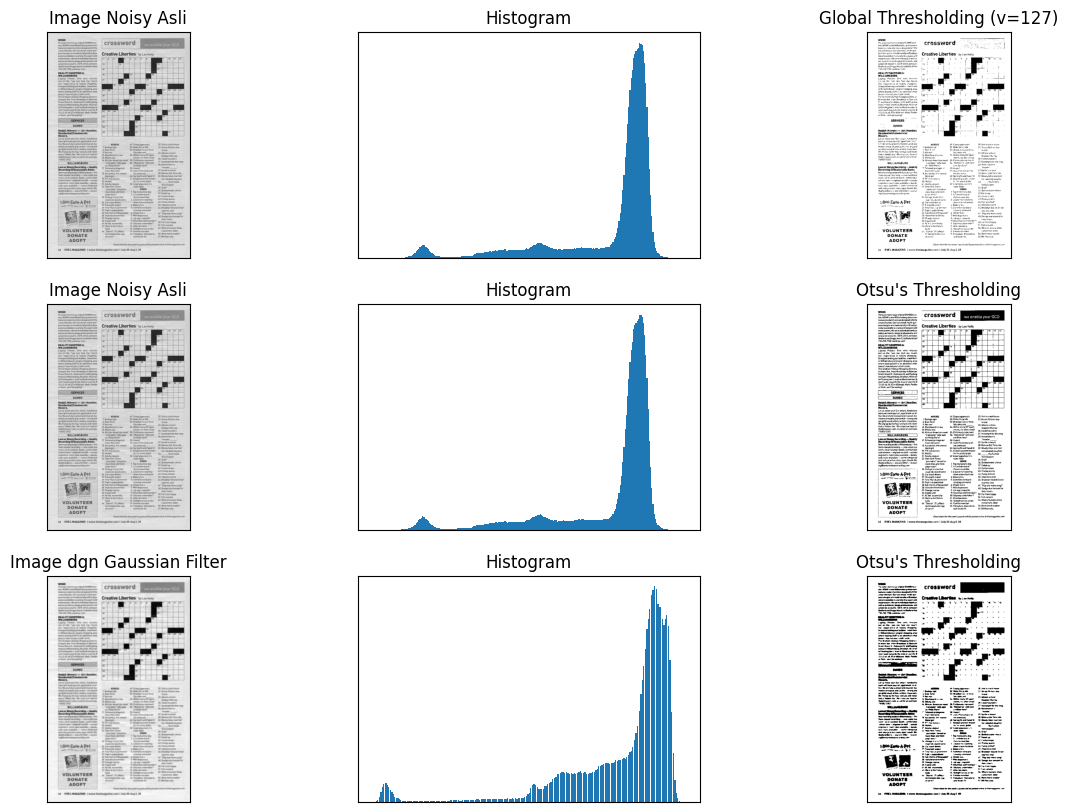

In [11]:
# Otsu Threshold

filename = ('drive/MyDrive/PCVK/crossword.jpg')
img = cv.imread(filename,0)

#Global Thresholding
ret1,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# Otsu's thresholding setelah dilakukan Gaussian filtering
blur = cv.GaussianBlur(img,(5,5),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
#plotting semua image
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Image Noisy Asli','Histogram','Global Thresholding (v=127)',
          'Image Noisy Asli','Histogram',"Otsu's Thresholding",
          'Image dgn Gaussian Filter','Histogram',"Otsu's Thresholding"]
plt.figure(figsize = (15,10))
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()